# Getting started

### Get thermodynamic and material properties using Chemical objects

Chemical objects are an extension of the [thermo.Chemical](http://thermo.readthedocs.io/en/latest/thermo.chemical.html) class from the Chemical Engineering Design Library.

Initiallize a Chemical object with an ID:

In [1]:
import biosteam as bst
Water = bst.compounds.Chemical('Water')
Water

Chemical: Water
 phase: 'l', T: 298.15 K, P: 101325 Pa


Chemical objects have a temperature `T`, pressure `P`, and `phase`:

In [2]:
Water.T, Water.P, Water.phase

(298.15, 101325, 'l')

You can view in different units with `show`:

In [3]:
Water.show(T='degC', P='atm')

Chemical: Water
 phase: 'l', T: 25 degC, P: 1 atm


Chemical objects contain thermodynamic properties:

In [4]:
Water.rho # (kg/m3)

997.0247522552814

These properties are dependent on temperature (T), pressure (P) and phase:

In [5]:
Water.T = 350 # (Kelvin)
Water.rho # (kg/m3)

971.4427816206321

Note how the density changed with temperature.

Many more material properties are available. Please read the [thermo.Chemical](http://thermo.readthedocs.io/en/latest/thermo.chemical.html) documentation to learn more.

### Group Chemical objects with a Species object

Initiallize a [Species](https://biosteam.readthedocs.io/en/latest/Species.html) object with IDs:

In [6]:
species = bst.Species('Methanol', 'Glycerol')
species

<Species: Methanol, Glycerol>

The Chemical objects are stored as attributes:

In [7]:
species.Methanol, species.Glycerol

(<Chemical: Methanol>, <Chemical: Glycerol>)

Set chemical attributes:

In [8]:
species.Water = Water
species

<Species: Methanol, Glycerol, Water>

### Material flows and mixture properties with Stream objects

First set the working species of all [Stream](https://biosteam.readthedocs.io/en/latest/Stream.html) objects:

In [9]:
bst.Stream.species = species # From before

A Stream is initialized with an ID, specie-flow rate pairs, temperature, pressure and phase:

In [10]:
feed = bst.Stream(ID='feed', Methanol=1, Glycerol=2, Water=3)
feed

Stream: feed
 phase: 'l', T: 298.15 K, P: 101325 Pa
 flow (kmol/hr): Methanol  1
                 Glycerol  2
                 Water     3


Alternatively, flow rates can be given as an iterable:

In [11]:
feed = bst.Stream(ID='feed', flow=(1,2,3), T=300, P=101325)
feed

Stream: feed
 phase: 'l', T: 300 K, P: 101325 Pa
 flow (kmol/hr): Methanol  1
                 Glycerol  2
                 Water     3


View with different units using the `show` method:

In [12]:
feed.show(flow='kg/hr', T='degC', P='atm')

Stream: feed
 phase: 'l', T: 26.85 degC, P: 1 atm
 flow (kg/hr): Methanol  32
               Glycerol  184
               Water     54


Flow rates can be conviniently get and set:

In [13]:
feed.setflow(Water=50, units='kg/hr')
feed.getflow('Methanol', 'Water', units='kg/hr')

array([32.04186, 50.0], dtype=object)

Stream objects contain T, P, and phase dependent properties:

In [14]:
feed.H # kJ/hr with reference at STP

1346.6344313289649

In [15]:
feed.T = 350
feed.H

39278.51231052598

Vapor liquid equilibrium is just a line away:

In [16]:
feed.T = 350
feed.VLE()
feed

MixedStream: feed
 phase: 'l', T: 350.19 K, P: 101325 Pa
         species   kmol/hr
 liquid: Methanol  1
         Glycerol  2
         Water     2.78


In [17]:
feed.VLE(V=0.5) # Set molar vapor fraction
feed

MixedStream: feed
 phase: 'lg', T: 381.94 K, P: 101325 Pa
         species   kmol/hr
 liquid: Methanol  0.227
         Glycerol  2
         Water     0.662

 vapor:  Methanol  0.773
         Glycerol  0.00096
         Water     2.11


The stream is cast to a [MixedStream](https://biosteam.readthedocs.io/en/latest/MixedStream.html) object. Mixed streams contain multiple phases:

In [18]:
feed.phase

'lg'

Please refer to the [MixedStream objects and thermodynamic equilibrium example](https://biosteam.readthedocs.io/en/latest/MixedStream objects and thermodynamic equilibrium.html) for more details.

### Process settings

**Process settings include price of feeds and products, conditions of utilities, and the chemical engineering plant cost index. These should be set before simulating a system.**

Set the chemical engineering plant cost index:

In [19]:
bst.CE # Default year is 2018

567.5

In [20]:
bst.CE = 603.1 # To year 2018

Set price of streams:

In [21]:
feed.price # Default price is zero

0

In [22]:
feed.price = 0.50

Set [PowerUtility](https://biosteam.readthedocs.io/en/latest/PowerUtility.html) options:

In [23]:
bst.PowerUtility.price # Default price

0.0782

In [24]:
bst.PowerUtility.price = 0.065 # Adjust price

Set [HeatUtility](https://biosteam.readthedocs.io/en/latest/HeatUtility.html) options:

In [25]:
bst.HeatUtility.cooling_agents # Dictionary of available cooling agents

{'Cooling water': <UtilityAgent: T=305.372 K>,
 'Chilled water': <UtilityAgent: T=280.372 K>,
 'Chilled Brine': <UtilityAgent: T=255.372 K>}

In [26]:
cw = bst.HeatUtility.cooling_agents['Cooling water']
cw # A UtilityAgent


UtilityAgent:
 species     <Species: Water>
 molfrac     (1.00,)
 T           305.37     K
 P           101,325    Pa
 phase       'l'
 Hvap        None       kJ/kmol
 T_limit     324.82     K
 price_kJ    0          USD/kJ
 price_kmol  0.0004879  USD/kmol
 efficiency  1.00


In [27]:
# Data is stored as attributes
(cw.species, cw.molfrac, cw.T, cw.P, cw.phase, cw.T_limit, cw.price_kJ, cw.price_kmol, cw.efficiency)

(<Species: Water>, (1,), 305.372, 101325, 'l', 324.817, 0, 0.00048785, 1)

In [28]:
cw.T = 302 # Change temperature (K)

In [29]:
bst.HeatUtility.heating_agents # Dictionary of available heating agents

{'Low pressure steam': <UtilityAgent: T=411.494 K>,
 'Medium pressure steam': <UtilityAgent: T=454.484 K>,
 'High pressure steam': <UtilityAgent: T=508.858 K>}

In [30]:
bst.HeatUtility.heating_agents['Low pressure steam'] # A UtilityAgent

UtilityAgent:
 species     <Species: Water>
 molfrac     (1.00,)
 T           411.49    K
 P           344,738   Pa
 phase       'g'
 Hvap        3.89e+04  kJ/kmol
 T_limit     None      K
 price_kJ    0         USD/kJ
 price_kmol  0.2378    USD/kmol
 efficiency  0.95


In [31]:
bst.HeatUtility.heating_agents['Low pressure steam'].price_kmol = 0.20 # Change price (USD/kmol)

### Find design requirements and cost with Unit objects

[Creating a Unit](https://biosteam.readthedocs.io/en/latest/Creating a Unit.html) can be flexible. But in summary, a [Unit](https://biosteam.readthedocs.io/en/latest/Unit.html) object is initialized with an ID, and unit specific arguments:

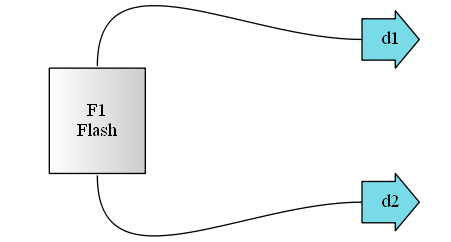

Flash: F1
ins...
[0] missing stream
outs...
[0] d1
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow: 0
[1] d2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [32]:
# Specify vapor fraction and isobaric conditions
F1 = bst.units.Flash('F1', V=0.5, P=101325)
F1

Note that, by default, Missing Stream objects are given to inputs, `ins`, and empty streams to outputs, `outs`:

In [33]:
F1.ins

[<MissingStream>]

In [34]:
F1.outs

[<Stream: d1>, <Stream: d2>]

You can connect streams by setting the `ins` and `outs`:

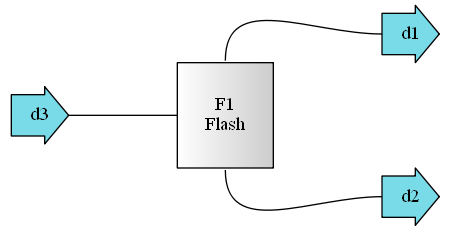

Flash: F1
ins...
[0] d3
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  180
                    Water     220
outs...
[0] d1
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow: 0
[1] d2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [35]:
F1.ins[0] = bst.Stream(Water=220, Glycerol=180)
F1

To simulate the flash, use the `simulate` method:

In [36]:
F1.simulate()
F1.show()

Flash: F1
ins...
[0] d3
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  180
                    Water     220
outs...
[0] d1
    phase: 'g', T: 416.81 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  0.72
                    Water     199
[1] d2
    phase: 'l', T: 416.81 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  179
                    Water     20.7


The `results` method returns simulation results:

In [37]:
F1.results() # Default returns DataFrame object with units

Flash                                   Units            F1
Medium pressure steam Duty              kJ/hr      1.67e+07
                      Flow            kmol/hr           461
                      Cost             USD/hr           127
Design                SepType                      Vertical
                      Length               ft          18.5
                      Diameter             ft           4.5
                      Weight               lb      3.77e+03
                      Wall thickness       in         0.312
                      Material                 Carbon steel
Cost                  Flash               USD      3.91e+04
                      Heat exchanger      USD      2.66e+04
Purchase cost                             USD      6.56e+04
Utility cost                           USD/hr           127

In [38]:
F1.results(with_units=False) # Returns Series object without units

Medium pressure steam  Duty                  1.67e+07
                       Flow                       461
                       Cost                       127
Design                 SepType               Vertical
                       Length                    18.5
                       Diameter                   4.5
                       Weight                3.77e+03
                       Wall thickness           0.312
                       Material          Carbon steel
Cost                   Flash                 3.91e+04
                       Heat exchanger        2.66e+04
Purchase cost                                6.56e+04
Utility cost                                      127
Name: F1, dtype: object

### Solve recycle loops and process specifications with System objects

**Designing a chemical process is no easy task. A simple recycle process consisting of a flash with a partial liquid recycle is presented here.**

Create a [Mixer](https://biosteam.readthedocs.io/en/latest/Mixer.html) object and a [Splitter](https://biosteam.readthedocs.io/en/latest/Splitter.html) object:

In [39]:
M1 = bst.units.Mixer('M1')
S1 = bst.units.Splitter('S1', split=0.5) # Split to 0th output stream
F1.outs[0].ID = 'product'

You can [find unit operations and manage flowsheets](https://biosteam.readthedocs.io/en/latest/Find unit operations and manage flowsheets.html) with `find`:

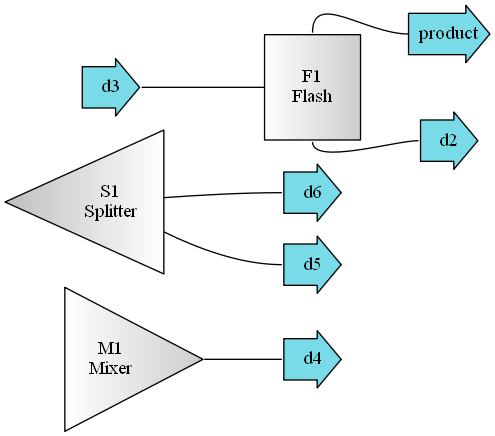

In [40]:
bst.find.diagram()

Connect streams and make a recycle loop using [-pipe- notation](https://biosteam.readthedocs.io/en/latest/Using -pipe- notation.html):

In [41]:
feed = bst.Stream('feed', Glycerol=100, Water=450)

# Broken down -pipe- notation
[S1-0, feed]-M1     # M1.ins[:] = [S1.outs[0], feed]
M1-F1               # F1.ins[:] = M1.outs
F1-1-S1             # S1.ins[:] = [F1.outs[1]]

# All together
[S1-0, feed]-M1-F1-1-S1;

Create [System](https://biosteam.readthedocs.io/en/latest/System.html) object by specifying an ID, a `recycle` stream and a `network` of units:

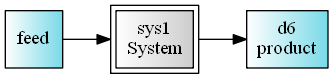

System: sys1
 recycle: d5
 network: (M1, F1, S1)
 convergence error: Flow rate   0.00e+00 kmol/hr
                    Temperature 0.00e+00 K
 iterations: 0


In [42]:
sys1 = bst.System('sys1', network=(M1, F1, S1), recycle=S1-0) # recycle=S1.outs[0]
sys1

View the System object as a Graphviz diagram:

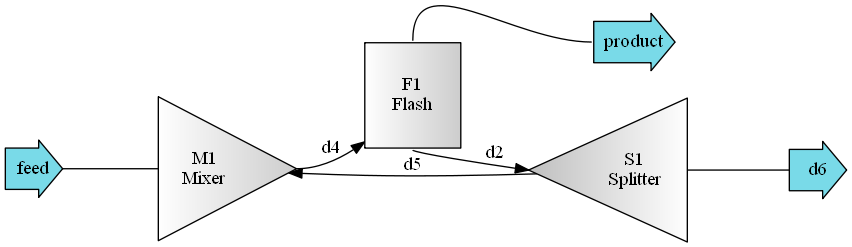

In [43]:
sys1.diagram()

Simulate the System object:

In [44]:
sys1.simulate()
sys1.show()

System: sys1
 recycle: d5
 network: (M1, F1, S1)
 convergence error: Flow rate   2.68e-03 kmol/hr
                    Temperature 2.41e-04 K
 iterations: 9


In [45]:
F1.show()

Flash: F1
ins...
[0] d4  from  Mixer-M1
    phase: 'l', T: 327.55 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  200
                    Water     533
outs...
[0] product
    phase: 'g', T: 377.45 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  0.0795
                    Water     367
[1] d2  to  Splitter-S1
    phase: 'l', T: 377.45 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  200
                    Water     167


In [46]:
F1.results()

Flash                                Units            F1
Low pressure steam Duty              kJ/hr      2.04e+07
                   Flow            kmol/hr           524
                   Cost             USD/hr           105
Design             SepType                      Vertical
                   Length               ft          16.5
                   Diameter             ft           6.5
                   Weight               lb      6.25e+03
                   Wall thickness       in         0.375
                   Material                 Carbon steel
Cost               Flash               USD      5.08e+04
                   Heat exchanger      USD      3.22e+04
Purchase cost                          USD       8.3e+04
Utility cost                        USD/hr           105

Save a system report:

In [47]:
sys1.save_report('Example.xlsx') # Try this on your computer and open excel

Once process settings are set and the system is simulated, it is possible to perform [techno-economic analysis of a biorefinery](https://biosteam.readthedocs.io/en/latest/Techno-economic analysis of a biorefinery.html). If a [TEA](https://biosteam.readthedocs.io/en/latest/TEA.html) object of the system was initialized, TEA results would also appear in the report.

### Join the community!

BioSTEAM will become more relevant with communitity involvement. It is strongly encouraged to share designs and new [Unit subclasses](https://biosteam.readthedocs.io/en/latest/Inheriting from Unit.html), no matter how preliminary or rigorous they are.